## Remove unused columns, rows with missing info, etc.

In [1]:
import sys

sys.path.append("../scripts")

import pandas as pd
from matplotlib import pyplot as plt

from load import load_config, merge_metadata
from plot_utils import plot_unique_value_hist
from preprocess import drop_na_feature_rows

#### Read and merge metadata

In [11]:
metadata_configs = load_config("../configs/metadata")
metadata_configs.keys()

dict_keys(['well', 'profile', 'platemap', 'cell_count', 'crispr'])

In [12]:
ann_df = merge_metadata(metadata_configs)
ann_df

,Metadata_JCP2022,Metadata_NCBI_Gene_ID,Metadata_Symbol,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Cells_Count,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,...,Nuclei_Texture_Variance_RNA_10_03_256,Nuclei_Texture_Variance_RNA_3_00_256,Nuclei_Texture_Variance_RNA_3_01_256,Nuclei_Texture_Variance_RNA_3_02_256,Nuclei_Texture_Variance_RNA_3_03_256,Nuclei_Texture_Variance_RNA_5_00_256,Nuclei_Texture_Variance_RNA_5_01_256,Nuclei_Texture_Variance_RNA_5_02_256,Nuclei_Texture_Variance_RNA_5_03_256,Metadata_Batch
0,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,B02,platemap_0,4534,2388.904878,4479.613330,...,4.896664,4.761614,4.876442,4.766664,4.869196,4.943670,5.096249,4.939405,5.097577,20220914_Run1
1,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,D23,platemap_0,4202,2489.940938,4644.403906,...,5.155230,4.992053,5.104570,4.990923,5.104767,5.173030,5.340875,5.173708,5.333586,20220914_Run1
2,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,E02,platemap_0,3800,2711.943376,5104.377930,...,6.655836,6.328478,6.460094,6.336254,6.461914,6.546204,6.772015,6.556404,6.774161,20220914_Run1
3,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,G23,platemap_0,4603,2354.403391,4377.685068,...,4.865922,4.728571,4.829505,4.731671,4.837768,4.891207,5.030049,4.899869,5.054411,20220914_Run1
4,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,H02,platemap_0,4365,2415.098143,4512.821830,...,4.966997,4.746743,4.855957,4.752940,4.848219,4.913199,5.076068,4.919745,5.073488,20220914_Run1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51180,JCP2022_807640,7422.0,VEGFA,source_13,CP-CC9-R8-02,C15,platemap_148,2764,3303.204998,6441.278522,...,18.967403,18.214170,18.421720,18.207863,18.419019,18.578171,18.924216,18.566880,18.933320,20221120_Run6
51181,JCP2022_807703,56949.0,XAB2,source_13,CP-CC9-R8-02,L19,platemap_148,1456,2735.282280,5291.493819,...,53.224013,52.942747,52.869385,52.929138,52.961730,52.973179,53.476004,52.979452,53.646764,20221120_Run6
51182,JCP2022_807717,7516.0,XRCC2,source_13,CP-CC9-R8-02,A12,platemap_148,2439,3188.306524,6269.132130,...,21.405860,20.510365,20.762839,20.565311,20.786112,20.897826,21.273827,20.934913,21.297743,20221120_Run6
51183,JCP2022_807725,64131.0,XYLT1,source_13,CP-CC9-R8-02,J18,platemap_148,3415,2904.822424,5671.880540,...,16.591979,15.723742,15.914057,15.746001,15.899239,16.042307,16.322910,16.039168,16.360566,20221120_Run6


#### Visualize ratio of num unique values to data size

Experiments showed that even after adding cell pcounts as a feature, it typically is filtered out later by pycytominer's `feature_select`.

The reason for that is relatively low number of unique values.

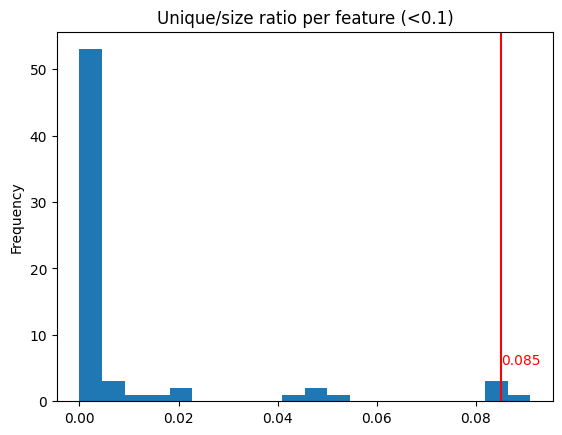

In [13]:
plot_unique_value_hist(ann_df, unique_ratio_cutoff=0.1, features="Cells_Count")

#### List metadata stats

In [14]:
ann_df.filter(regex="^Metadata_").nunique()

Metadata_JCP2022           7977
Metadata_NCBI_Gene_ID      7975
Metadata_Symbol            7977
Metadata_Source               1
Metadata_Plate              148
Metadata_Well               384
Metadata_plate_map_name     102
Metadata_Batch                6
dtype: int64

#### Remove rows with NaNs in features

In [15]:
ann_df[ann_df.filter(regex="^(?!Metadata_)").isnull().T.any()]

,Metadata_JCP2022,Metadata_NCBI_Gene_ID,Metadata_Symbol,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Cells_Count,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,...,Nuclei_Texture_Variance_RNA_10_03_256,Nuclei_Texture_Variance_RNA_3_00_256,Nuclei_Texture_Variance_RNA_3_01_256,Nuclei_Texture_Variance_RNA_3_02_256,Nuclei_Texture_Variance_RNA_3_03_256,Nuclei_Texture_Variance_RNA_5_00_256,Nuclei_Texture_Variance_RNA_5_01_256,Nuclei_Texture_Variance_RNA_5_02_256,Nuclei_Texture_Variance_RNA_5_03_256,Metadata_Batch
0,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,B02,platemap_0,4534,2388.904878,4479.613330,...,4.896664,4.761614,4.876442,4.766664,4.869196,4.943670,5.096249,4.939405,5.097577,20220914_Run1
1,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,D23,platemap_0,4202,2489.940938,4644.403906,...,5.155230,4.992053,5.104570,4.990923,5.104767,5.173030,5.340875,5.173708,5.333586,20220914_Run1
2,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,E02,platemap_0,3800,2711.943376,5104.377930,...,6.655836,6.328478,6.460094,6.336254,6.461914,6.546204,6.772015,6.556404,6.774161,20220914_Run1
3,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,G23,platemap_0,4603,2354.403391,4377.685068,...,4.865922,4.728571,4.829505,4.731671,4.837768,4.891207,5.030049,4.899869,5.054411,20220914_Run1
4,JCP2022_800001,NaN,no-guide,source_13,CP-CC9-R1-01,H02,platemap_0,4365,2415.098143,4512.821830,...,4.966997,4.746743,4.855957,4.752940,4.848219,4.913199,5.076068,4.919745,5.073488,20220914_Run1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51180,JCP2022_807640,7422.0,VEGFA,source_13,CP-CC9-R8-02,C15,platemap_148,2764,3303.204998,6441.278522,...,18.967403,18.214170,18.421720,18.207863,18.419019,18.578171,18.924216,18.566880,18.933320,20221120_Run6
51181,JCP2022_807703,56949.0,XAB2,source_13,CP-CC9-R8-02,L19,platemap_148,1456,2735.282280,5291.493819,...,53.224013,52.942747,52.869385,52.929138,52.961730,52.973179,53.476004,52.979452,53.646764,20221120_Run6
51182,JCP2022_807717,7516.0,XRCC2,source_13,CP-CC9-R8-02,A12,platemap_148,2439,3188.306524,6269.132130,...,21.405860,20.510365,20.762839,20.565311,20.786112,20.897826,21.273827,20.934913,21.297743,20221120_Run6
51183,JCP2022_807725,64131.0,XYLT1,source_13,CP-CC9-R8-02,J18,platemap_148,3415,2904.822424,5671.880540,...,16.591979,15.723742,15.914057,15.746001,15.899239,16.042307,16.322910,16.039168,16.360566,20221120_Run6


In [13]:
ann_df = drop_na_feature_rows(ann_df)
ann_df

,Metadata_JCP2022,Metadata_NCBI_Gene_ID,Metadata_Symbol,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Cells_Count,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,...,Nuclei_Texture_Variance_RNA_10_03_256,Nuclei_Texture_Variance_RNA_3_00_256,Nuclei_Texture_Variance_RNA_3_01_256,Nuclei_Texture_Variance_RNA_3_02_256,Nuclei_Texture_Variance_RNA_3_03_256,Nuclei_Texture_Variance_RNA_5_00_256,Nuclei_Texture_Variance_RNA_5_01_256,Nuclei_Texture_Variance_RNA_5_02_256,Nuclei_Texture_Variance_RNA_5_03_256,Metadata_Batch
0,JCP2022_800002,NaN,non-targeting,source_13,CP-CC9-R1-01,L23,platemap_0,3506,2815.467199,5299.306047,...,3.394339,3.251790,3.318745,3.253297,3.322738,3.363407,3.471751,3.365391,3.479173,20220914_Run1
1,JCP2022_800002,NaN,non-targeting,source_13,CP-CC9-R1-01,M02,platemap_0,3130,2986.046370,5678.196354,...,5.160493,4.864203,4.961526,4.862226,4.959763,5.032626,5.205669,5.027805,5.208637,20220914_Run1
2,JCP2022_800560,383.0,ARG1,source_13,CP-CC9-R1-01,P05,platemap_0,2587,3373.096012,6542.398374,...,4.878451,4.648472,4.741718,4.647042,4.742305,4.811227,4.966060,4.804602,4.973344,20220914_Run1
3,JCP2022_801854,1763.0,DNA2,source_13,CP-CC9-R1-01,F14,platemap_0,1193,6570.136975,12657.376471,...,7.590163,7.052303,7.171796,7.061161,7.168628,7.241956,7.454316,7.242803,7.451551,20220914_Run1
4,JCP2022_802264,2176.0,FANCC,source_13,CP-CC9-R1-01,M06,platemap_0,2379,3651.043808,7014.198399,...,5.706191,5.340595,5.445001,5.345338,5.440862,5.509518,5.699280,5.515500,5.695106,20220914_Run1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,JCP2022_805264,5347.0,PLK1,source_13,CP-CC9-R7-02,B23,platemap_148,697,2220.992826,4128.482066,...,36.517233,38.491731,38.190347,38.268594,38.648920,38.436508,38.219932,38.157920,38.734828,20221120_Run6
2658,JCP2022_805964,58480.0,RHOU,source_13,CP-CC9-R7-02,N13,platemap_148,2904,3176.282219,6182.278429,...,17.120510,16.246540,16.464615,16.263629,16.463363,16.611238,16.968672,16.591778,16.955396,20221120_Run6
2659,JCP2022_805964,58480.0,RHOU,source_13,CP-CC9-R7-02,N13,platemap_148,2904,3176.282219,6182.278429,...,17.120510,16.246540,16.464615,16.263629,16.463363,16.611238,16.968672,16.591778,16.955396,20221120_Run6
2660,JCP2022_806800,6484.0,ST3GAL4,source_13,CP-CC9-R7-02,A07,platemap_148,2125,3717.076307,7306.579369,...,12.883767,12.406199,12.518053,12.416554,12.543330,12.612615,12.774047,12.604854,12.798353,20221120_Run6


#### Save filtered profiles with metadata

In [16]:
ann_df.to_parquet("output/raw_filtered_profiles.parquet", index=False)

#### Make sure no metadata columns weren't matched when merging

In [17]:
# list features ending with either "_x" or "_y", case insensitive
ann_df.columns[ann_df.columns.str.contains("(_x|_y)$", case=False)]

/var/folders/r4/djvpf55j1rvfhqb8hhcwqr7w0000gq/T/ipykernel_97941/3356552406.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


Index(['Cells_AreaShape_BoundingBoxMaximum_X',
       'Cells_AreaShape_BoundingBoxMaximum_Y',
       'Cells_AreaShape_BoundingBoxMinimum_X',
       'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Center_X',
       'Cells_AreaShape_Center_Y', 'Cytoplasm_AreaShape_BoundingBoxMaximum_X',
       'Cytoplasm_AreaShape_BoundingBoxMaximum_Y',
       'Cytoplasm_AreaShape_BoundingBoxMinimum_X',
       'Cytoplasm_AreaShape_BoundingBoxMinimum_Y',
       'Cytoplasm_AreaShape_Center_X', 'Cytoplasm_AreaShape_Center_Y',
       'Nuclei_AreaShape_BoundingBoxMaximum_X',
       'Nuclei_AreaShape_BoundingBoxMaximum_Y',
       'Nuclei_AreaShape_BoundingBoxMinimum_X',
       'Nuclei_AreaShape_BoundingBoxMinimum_Y', 'Nuclei_AreaShape_Center_X',
       'Nuclei_AreaShape_Center_Y', 'Nuclei_Location_Center_X',
       'Nuclei_Location_Center_Y'],
      dtype='object')